# Detección de Objetos con YOLOv8 Nano 🕵️‍♂️🖼️

### Tigre Hacks 2023 - Monterrey 🐯
-----

*Por: [Missael Barco](https://www.linkedin.com/in/gmissaelbarco/)*

En este notebook, vamos a explorar la detección de objetos en imágenes utilizando YOLOv8 Nano. YOLO (You Only Look Once) es una popular red neuronal de detección de objetos en tiempo real. YOLOv8 Nano es una versión reducida de la última versión de YOLO, que ha sido optimizada para funcionar en dispositivos con recursos computacionales limitados.

Esto nos permite utilizar el modelo en aplicaciones web interactivas, como las que podemos construir con Streamlit, sin que la detección de objetos ralentice significativamente la experiencia del usuario.

Durante este taller, vamos a cargar una imagen, pasarla por el modelo YOLOv8 Nano, y visualizar los objetos detectados en la imagen. Esto nos servirá como base para crear una aplicación Streamlit donde los usuarios puedan subir sus propias imágenes y ver los objetos que el modelo detecta.

Recuerda que este es solo un vistazo a lo que puedes lograr con la detección de objetos y los modelos pre-entrenados. ¡El cielo es el límite cuando se trata de aplicaciones de Computer Vision!


In [8]:
import ultralytics
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import urllib

ultralytics.checks()

%matplotlib inline

Ultralytics YOLOv8.0.105 🚀 Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete ✅ (16 CPUs, 7.4 GB RAM, 162.2/250.9 GB disk)


¡Usar el modelo es muy sencillo!, aquí un ejemplo funcional usando una imagen de prueba en internet:

In [5]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

model_output = model("https://ultralytics.com/images/bus.jpg")[0]  # predict on an image

results = model_output.boxes.boxes.cpu().numpy()
results

100%|██████████| 6.23M/6.23M [00:00<00:00, 29.0MB/s]

100%|██████████| 476k/476k [00:00<00:00, 4.10MB/s]
image 1/1 /home/missa/projects/HackCIMAT/streamlit_workshop/notebooks/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 133.4ms
Speed: 10.5ms preprocess, 133.4ms inference, 33.2ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


array([[     17.282,      230.59,      801.53,      768.41,     0.87037,           5],
       [     48.738,      399.27,      244.51,      902.51,     0.86903,           0],
       [     670.26,      380.28,      809.86,      875.69,     0.85355,           0],
       [      221.4,      405.79,      344.73,       857.4,     0.81943,           0],
       [   0.063977,      254.64,      32.289,      325.04,     0.34571,          11],
       [          0,         551,      67.102,      873.94,     0.30068,           0]], dtype=float32)

El modelo funciona, y nos da resultados... pero no podemos interpretar una matriz de numeros asociada a una imagen. ¡Visualizemos el resultado! 👀

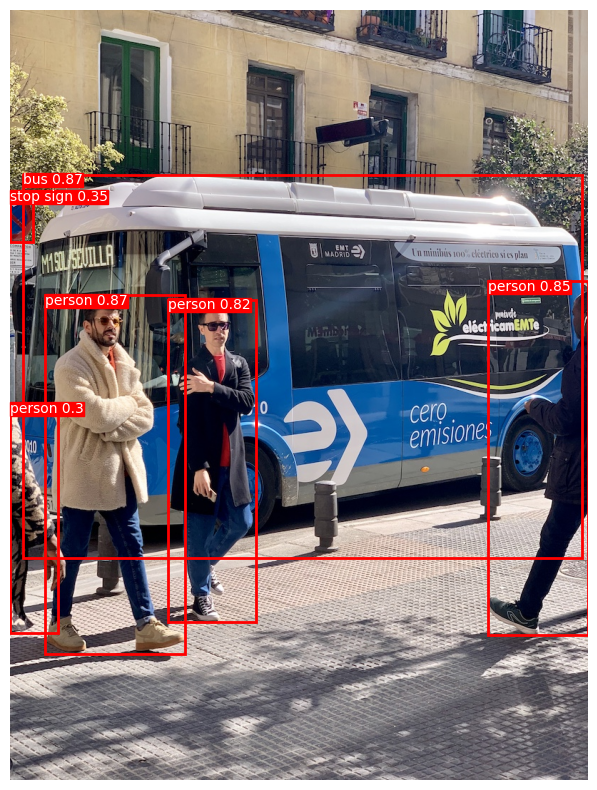

In [15]:
img = np.array(PIL.Image.open(urllib.request.urlopen("https://ultralytics.com/images/bus.jpg")))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(img)

# Plot boxes
for result in results:
    # Draw square
    ax.add_patch(plt.Rectangle((result[0], result[1]),
        result[2] - result[0],
        result[3] - result[1],
        fill=False,
        edgecolor='red',
        linewidth=2))

    # Get name
    name = model_output.names[int(result[5])]

    # Draw label
    ax.text(result[0], result[1] - 2,
        s=str(name) + ' ' + str(round(result[4], 2)),
        color='white',
        verticalalignment='top',
        bbox={'color': 'red', 'pad': 0})

#Remove axes
ax.axis('off')
plt.show()

¡Genial! Ahora vemos que el modelo funciona. Creemos una función que ejecute el modelo y cree esta visualización para cualquier imagen que le pasemos. 🔥

In [16]:
def bounding_boxes(img):
    model = YOLO("yolov8n.pt")

    model_output = model(img)[0]

    results = model_output.boxes.boxes.cpu().numpy()

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img)

    # Plot boxes
    for result in results:
        # Draw square
        ax.add_patch(plt.Rectangle((result[0], result[1]),
            result[2] - result[0],
            result[3] - result[1],
            fill=False,
            edgecolor='red',
            linewidth=2))

        # Get name
        name = model_output.names[int(result[5])]

        # Draw label
        ax.text(result[0], result[1] - 2,
            s=str(name) + ' ' + str(round(result[4], 2)),
            color='white',
            verticalalignment='top',
            bbox={'color': 'red', 'pad': 0})

    #Remove axes
    ax.axis('off')

    return fig

¡Puedes probar aquí con tus propias imágenes! 📸 Solo indica la ruta de la imagen en tu computadora y corre la celda.


0: 384x640 2 persons, 3 bottles, 2 cups, 4 chairs, 1 dining table, 24.3ms
Speed: 3.6ms preprocess, 24.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


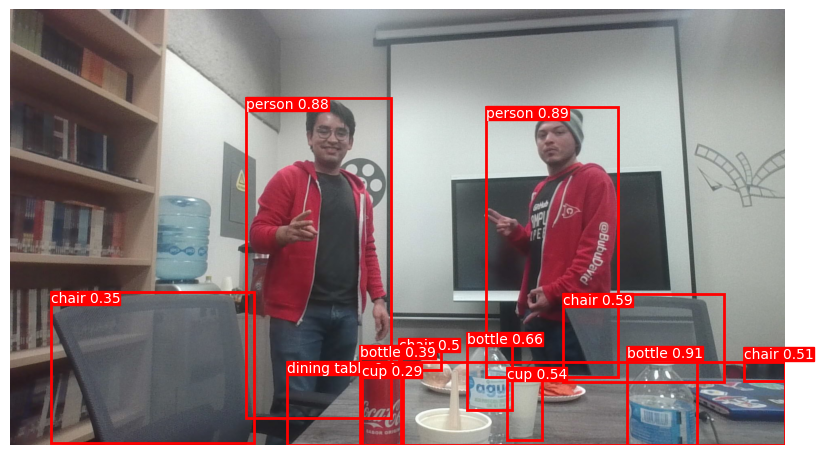

In [17]:
img = plt.imread('../examples/CE.jpg')

# Si estas en Colab, comenta la linea anterior y descomenta la siguiente
# img = np.array(PIL.Image.open(urllib.request.urlopen("https://i.imgur.com/ptEinAD.jpg")))

bounding_boxes(img)

plt.show()